In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("manufacturing_dataset_1000_samples.csv")

# Show first 5 rows
df.head()


,Timestamp,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,2023-01-01 00:00:00,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,Type_B,Economy,Thursday,1.625,42.3,0.063,0.510,36.5
1,2023-01-01 01:00:00,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,Type_A,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9
2,2023-01-01 02:00:00,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,Type_A,Standard,Monday,1.922,29.4,0.061,0.551,56.9
3,2023-01-01 03:00:00,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,Type_A,Premium,Saturday,2.215,52.3,0.054,0.293,31.0
4,2023-01-01 04:00:00,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,Type_B,Premium,Monday,1.691,54.9,0.145,0.443,15.0


In [2]:
# Check if any column has missing values
df.isnull().sum()


Timestamp                      0
Injection_Temperature          0
Injection_Pressure             0
Cycle_Time                     0
Cooling_Time                   0
Material_Viscosity            20
Ambient_Temperature           20
Machine_Age                    0
Operator_Experience           20
Maintenance_Hours              0
Shift                          0
Machine_Type                   0
Material_Grade                 0
Day_of_Week                    0
Temperature_Pressure_Ratio     0
Total_Cycle_Time               0
Efficiency_Score               0
Machine_Utilization            0
Parts_Per_Hour                 0
dtype: int64

In [4]:
# Fill missing values safely (no warnings)
df['Material_Viscosity'] = df['Material_Viscosity'].fillna(df['Material_Viscosity'].mean())
df['Ambient_Temperature'] = df['Ambient_Temperature'].fillna(df['Ambient_Temperature'].mean())
df['Operator_Experience'] = df['Operator_Experience'].fillna(df['Operator_Experience'].mean())


In [5]:
# Convert text (categorical) columns into numbers using one-hot encoding
df = pd.get_dummies(df, columns=['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week'], drop_first=True)

df.head()


,Timestamp,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,...,Machine_Type_Type_B,Machine_Type_Type_C,Material_Grade_Premium,Material_Grade_Standard,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,2023-01-01 00:00:00,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,...,True,False,False,False,False,False,False,True,False,False
1,2023-01-01 01:00:00,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,...,False,False,False,True,False,False,False,False,False,True
2,2023-01-01 02:00:00,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,...,False,False,False,True,True,False,False,False,False,False
3,2023-01-01 03:00:00,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,...,False,False,True,False,False,True,False,False,False,False
4,2023-01-01 04:00:00,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,...,True,False,True,False,True,False,False,False,False,False


In [7]:
# Remove non-numeric columns like Timestamp or any leftover strings
df = df.select_dtypes(include=['int64', 'float64'])

print("Remaining numeric columns after cleanup:", df.columns.tolist())


Remaining numeric columns after cleanup: ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature', 'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score', 'Machine_Utilization', 'Parts_Per_Hour']


In [8]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Scale only the numerical columns (except the target)
X = df.drop('Parts_Per_Hour', axis=1)
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for clarity
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Target column
y = df['Parts_Per_Hour']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 20.046662533395423
Root Mean Squared Error: 4.477349945380126
R² Score: 0.846377310543826


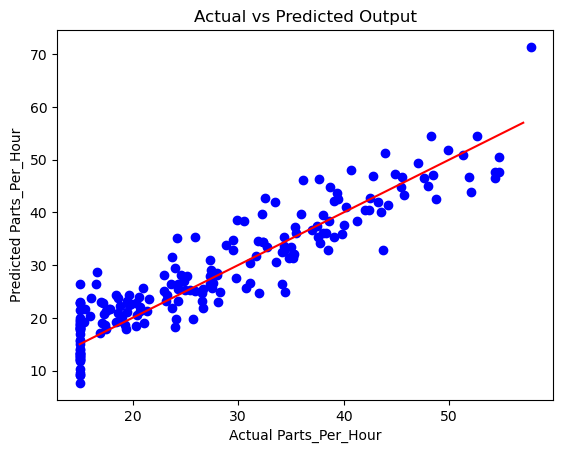

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, color='blue')
plt.plot(np.arange(min(y_test), max(y_test)), np.arange(min(y_test), max(y_test)), color='red') 
plt.xlabel("Actual Parts_Per_Hour")
plt.ylabel("Predicted Parts_Per_Hour")
plt.title("Actual vs Predicted Output")
plt.show()


In [15]:
import joblib

# Save your trained model
joblib.dump(model, "linear_regression_model.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!
